This is a Jupyter Ipython notebook for Support Vector Machine, Support Vector Classificator. Support Vector Machines are algorithms that can perform very well on linear datasets. For nonlinear datasets must be preprocessed. SVM search for a 'Margin' between the classes that exists, where the larger is the margin is very unlikely to have an overfitting model. In this example I only use two features in order to make a surface plot, but it can be expanded to many features.

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap
import numpy as np
from sklearn import datasets, preprocessing, cross_validation, metrics
from sklearn.svm import SVC

### Linear Data

In [9]:
iris = datasets.load_iris()
X = iris.data[:,[2,3]]
y = iris.target
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.3, random_state = 0)
sc = preprocessing.StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train.transpose(),y_test.transpose()))

In [10]:
svm = SVC(kernel = 'linear', C = 1.0, random_state = 0)
svm.fit(X_train_std, y_train)
y_pred = svm.predict(X_test_std)

In [11]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution = 0.02):
    # marker generator and color map
    markers = ('s','x','o','^','v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() -1, X[:,0].max()+1
    x2_min, x2_max = X[:, 1].min() -1, X[:,0].max()+1
    xx1, xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),np.arange(x2_min,x2_max,resolution))
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1,xx2,Z,alpha=0.4,cmap = cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
    # plot the samples
    X_test, y_test = X[test_idx,:], y[test_idx]
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl,0], y=X[y==cl,1], alpha = 0.8, c=cmap(idx), marker = markers[idx], label=cl)
    
    # highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:,1], c = '', alpha = 1.0, linewidth=1, marker='o', s=55, label='test set')
        
        

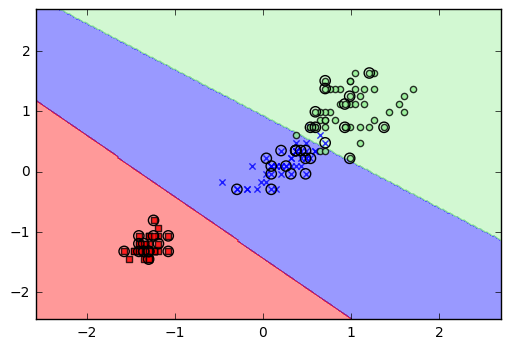

In [14]:
plot_decision_regions(X_combined_std,y_combined, classifier=svm, test_idx =range(105,150))

In [6]:
print('muestras clasificadas erroneas: %d' % (np.ravel(y_test) != y_pred).sum())
print('exactitud: %.2f' % metrics.accuracy_score(np.ravel(y_test),y_pred))

muestras clasificadas erroneas: 1
exactitud: 0.98


## If you are using a very large dataset

In [15]:
from sklearn.linear_model import SGDClassifier

In [16]:
svm = SGDClassifier(loss='hinge')